In [35]:
# UNIVERSITAT POLITÉCNICA DE VALÉNCIA
# Author: Daniel Sanz

import librosa
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import math as m
import scipy.io

xo = scipy.io.loadmat('mat/xo.mat', mat_dtype=True, squeeze_me=True)

# audio_path = 'audio/fold1/7383-3-0-1.wav' # dog_bark

# x1 , sr = librosa.load(audio_path, dtype=float64) # Carga las muestras digitales de audio
sr=22050

x = xo['xo']
print(x)
print(type(x), type(sr))
print(sr)
print(x.size)
print(x.dtype)

[-0.00440445 -0.00424124 -0.00376532 ... -0.0132636  -0.01721323
 -0.02338588]
<class 'numpy.ndarray'> <class 'int'>
22050
88200
float64


In [41]:
# IIR filter
# Coeficientes [num, den]
a = [1,-0.620204102886729,0.240408205773458]
b = [0.155051025721682,0.310102051443364,0.155051025721682]
# sos1=[0.155051025721682,0.310102051443364,0.155051025721682,1,-0.620204102886729,0.240408205773458]
# x impulso, en su lugar x la que toca
# filtra, y es la señal filtrada
x1 = signal.lfilter(b,a, x)

x_dec =x1[0:88199:2]
fs=int(sr/2)
print(x1)
print(x_dec)
# print(x_dec.size)
# print(x_dec)
# print(fs)

[-0.00068292 -0.00244699 -0.0039354  ... -0.0113014  -0.01304447
 -0.01639368]
[-0.00068292 -0.0039354  -0.00394611 ... -0.01483985 -0.01086583
 -0.01304447]


## Rama Derecha

Calcular Level Total (LTotal)

In [47]:
# Seguimos
# Lp_Pa es la longitud del vector p
# 0.267 segundos en fs
windowSize = 2940
# Solapamiento del 50% 
L_overlap = 1470
# Trozo que avanza 
Lavanza = 1470
# Longitud de xdec: Lxo/3 = 64000
Lxdec = 44100
# Numero de segmentos de 0.250 s que hay en 4 segundos (con solape)
Nseg = 29
# Inicializa LTotal 
LTotal = np.zeros(Nseg)

for n in range(Nseg):
    # print(n)
    aux = x_dec[n*Lavanza:n*Lavanza+windowSize:1]
    LTotal[n] = m.sqrt(np.mean(np.power(aux,2.0)))

print(LTotal.size)

ref = 20e-6
# Calcula la presion en dB
spl = LTotal/ref; 
print(spl)

29
[ 902.73939276  979.91847325 1003.13885982 1061.49066621 1092.65235473
 1222.9429816  1232.96574163 1132.34192848 1149.58652098 1208.2421784
 1221.91398299 1318.53763231 1418.05020672 1448.62301287 1479.69120664
 1523.89223169 1599.37652583 1611.87093571 1615.49438955 1703.81478423
 1734.63872222 1741.43359285 1723.90444418 1649.3137917  1652.48611921
 1663.27463287 1543.14328587 1585.76386008 1811.56944272]


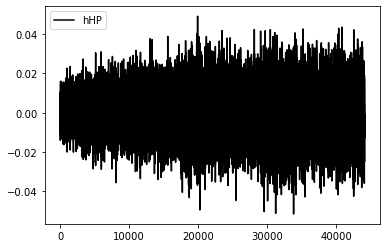

In [48]:
# High Filter
# Coeficientes [num, den]
# x impulso, en su lugar x la que toca
# x = signal.unit_impulse(700)
# filtra, y es la señal filtrada
b = [0.757076375333885,-1.51415275066777,0.757076375333885]
a = [1,-1.45424358625159,0.574061915083955]
# x impulso, en su lugar x la que toca
# filtra, y es la señal filtrada
xHP = signal.lfilter(b,a, x_dec)
# xHP = signal.sosfilt(sos2, x_dec)
plt.plot(xHP, 'k', label='hHP')
plt.legend(loc='best')
plt.show()

In [50]:
# Inicializa LHP 
LHP = np.zeros(Nseg)

for n in range(Nseg):
    # print(n)
    aux = xHP[n*Lavanza:n*Lavanza+windowSize:1]
    LHP[n] = m.sqrt(np.mean(np.power(aux,2.0)))

print(LHP.size)

ref = 20e-6
# Calcula la presion en dB
LHP_r = LHP/ref; 
print(LHP_r)

29
[323.45860601 355.66369181 381.96723143 398.27670882 425.73759373
 442.70744056 473.68089845 483.10511913 461.16872976 481.95761893
 511.5511488  564.34917937 627.68369692 620.61084711 583.04633735
 573.80078881 572.55236939 555.65018175 557.32376644 629.95259582
 682.36655172 675.92060671 658.28682094 619.68243345 592.00463964
 603.66924458 625.75379977 628.23603518 624.25518143]
